Import libraries and the data

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [348]:
prediktiv = pd.read_csv('prediktiv_data.csv', index_col = 'id' )

Start by exploring the dataset

In [313]:
prediktiv.info()

# The dataset exists of 35 columns and 2930 rows
#I can also see that feature11 and feature12 seems to have less values than the rest of the features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 1 to 2930
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       2930 non-null   int64  
 1   feature01    2929 non-null   float64
 2   feature02    2929 non-null   float64
 3   feature03    2930 non-null   int64  
 4   feature04    2929 non-null   float64
 5   feature05    2930 non-null   int64  
 6   feature06    2930 non-null   int64  
 7   feature07    2930 non-null   int64  
 8   feature08    2930 non-null   int64  
 9   feature09    2930 non-null   int64  
 10  feature10    2930 non-null   int64  
 11  feature10.1  2930 non-null   int64  
 12  feature11    198 non-null    object 
 13  feature12    572 non-null    object 
 14  feature13    2929 non-null   object 
 15  feature14    2930 non-null   int64  
 16  feature15    1508 non-null   object 
 17  feature16    2930 non-null   object 
 18  feature17    2930 non-null   int64  
 19  featur

In [314]:
#Sum the NAN-values in feature11
prediktiv['feature11'].isnull().sum()

2732

In [315]:
#... and i feature12
prediktiv['feature12'].isnull().sum()


2358

In [316]:
#and for feature15
prediktiv['feature15'].isnull().sum()

1422

In [317]:
#both feature11, feature12 and feature15 has a lot of NAN-values so I will start by removing them. 

prediktiv.drop(['feature11', 'feature12', 'feature15'], axis = 1, inplace = True)

In [318]:
#Lets look at the categorical features
print(prediktiv['feature13'].unique())
print(prediktiv['feature16'].unique())


['red' 'blue' 'green' 'yellow' nan 'pink']
['bad' 'good' 'amazing' 'okay' 'horrible']


In [319]:
#Lets create some dummy-variables from thoose features
prediktiv = pd.get_dummies(prediktiv, columns =['feature13', 'feature16'])

In [320]:
#There is still some NAN-values but I will just replace them with '0'
print(prediktiv['feature01'].value_counts())
prediktiv['feature01'].fillna(0, inplace= True)

print(prediktiv['feature02'].value_counts())
prediktiv['feature02'].fillna(0, inplace= True)

print(prediktiv['feature04'].value_counts())
prediktiv['feature04'].fillna(0, inplace= True)


2.0    1603
1.0     778
3.0     374
0.0     157
4.0      16
5.0       1
Name: feature01, dtype: int64
0.0      157
576.0     97
440.0     96
484.0     76
240.0     69
        ... 
715.0      1
902.0      1
595.0      1
581.0      1
405.0      1
Name: feature02, Length: 603, dtype: int64
0.0       79
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
839.0      1
1146.0     1
1415.0     1
1684.0     1
1003.0     1
Name: feature04, Length: 1058, dtype: int64


In [321]:
prediktiv.isnull().sum()

target                0
feature01             0
feature02             0
feature03             0
feature04             0
feature05             0
feature06             0
feature07             0
feature08             0
feature09             0
feature10             0
feature10.1           0
feature14             0
feature17             0
feature18             0
feature19             0
feature20             0
feature21             0
feature22             0
feature23             0
feature13_blue        0
feature13_green       0
feature13_pink        0
feature13_red         0
feature13_yellow      0
feature16_amazing     0
feature16_bad         0
feature16_good        0
feature16_horrible    0
feature16_okay        0
dtype: int64

,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,...,feature13_blue,feature13_green,feature13_pink,feature13_red,feature13_yellow,feature16_amazing,feature16_bad,feature16_good,feature16_horrible,feature16_okay
feature01,True,True,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
feature02,True,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
feature03,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
feature04,False,False,False,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
feature05,False,False,False,True,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
feature06,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
feature07,False,False,False,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
feature08,True,True,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,True,False,False,False
feature09,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
feature10,True,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


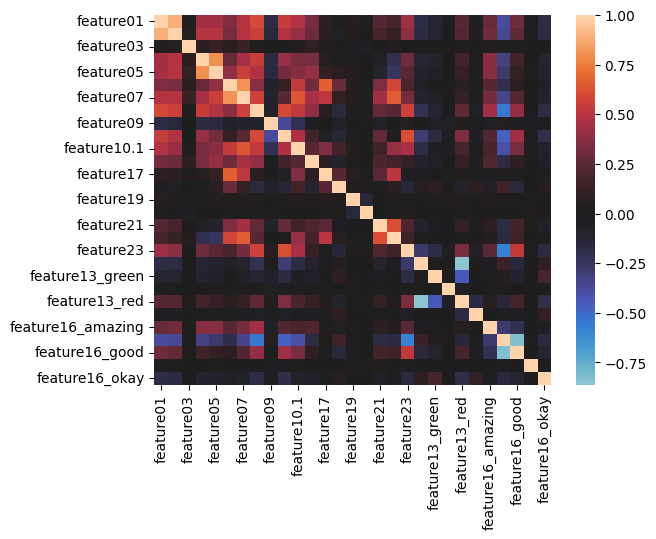

In [322]:
#Now I want too chech for multicollinarity (meaning: high correlatons between the features, making them unsuitable for analysis)
corr = prediktiv.drop('target', axis = 1)
sns.heatmap(corr.corr(), center = 0);
abs(corr.corr()) > 0.5

#I want to keep the features with a correlation (to the target) that is lower than 0.5
#This means that I will keep the features that is 'false' in the table below

In [323]:
#There was 3 features with high correlation among them and I will drop theese features
prediktiv.drop(['feature01', 'feature02', 'feature08', 'feature10'], axis = 1, inplace = True)

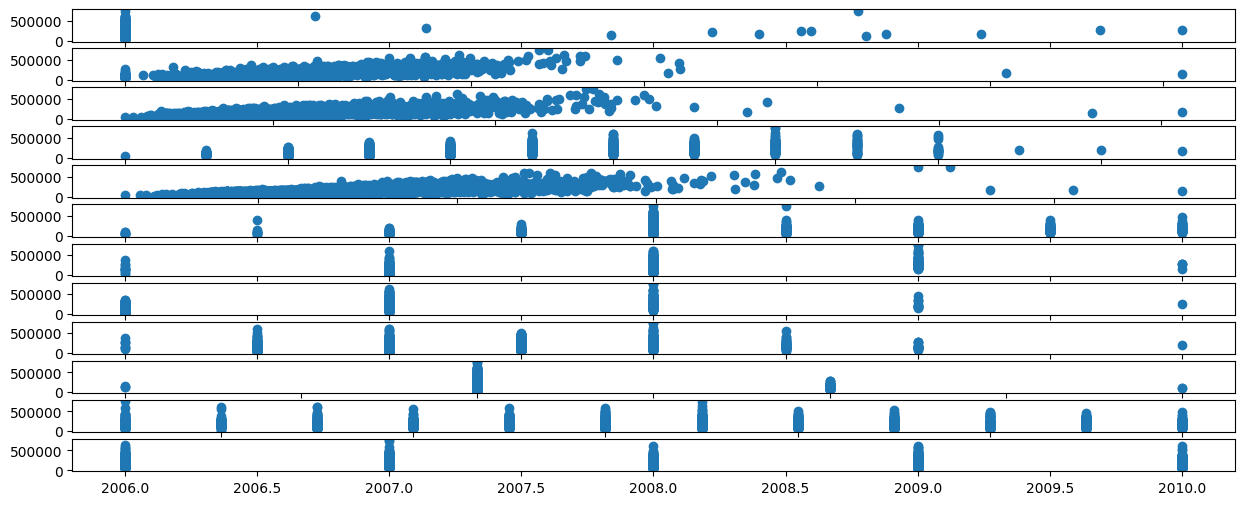

In [324]:
#Now lets to plot the features to look for outliers

fig, ax = plt.subplots(12, figsize = (15,6))
ax[0].scatter(x = prediktiv['feature03'], y = prediktiv['target'])
ax[1].scatter(x = prediktiv['feature04'], y = prediktiv['target'])
ax[2].scatter(x = prediktiv['feature05'], y = prediktiv['target'])
ax[3].scatter(x = prediktiv['feature06'], y = prediktiv['target'])
ax[4].scatter(x = prediktiv['feature07'], y = prediktiv['target'])
ax[5].scatter(x = prediktiv['feature09'], y = prediktiv['target'])
ax[6].scatter(x = prediktiv['feature10.1'], y = prediktiv['target'])
ax[7].scatter(x = prediktiv['feature14'], y = prediktiv['target'])
ax[8].scatter(x = prediktiv['feature17'], y = prediktiv['target'])
ax[9].scatter(x = prediktiv['feature18'], y = prediktiv['target'])
ax[10].scatter(x = prediktiv['feature19'], y = prediktiv['target'])
ax[11].scatter(x = prediktiv['feature20'], y = prediktiv['target'])


In [325]:
#Remove outliers (based on the scatterplots) that is bigger than 3 std. 
#This will make the data normalized

from scipy import stats
prediktiv = prediktiv[(np.abs(stats.zscore(prediktiv.feature03)) < 3)]
prediktiv = prediktiv[(np.abs(stats.zscore(prediktiv.feature04)) < 3)]
prediktiv = prediktiv[(np.abs(stats.zscore(prediktiv.feature05)) < 3)]
prediktiv = prediktiv[(np.abs(stats.zscore(prediktiv.feature07)) < 3)]


C:\Users\Emma\miniconda3\envs\environ\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Emma\miniconda3\envs\environ\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Emma\miniconda3\envs\environ\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Emma\miniconda3\envs\environ\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Emma\miniconda3\envs\environ\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid

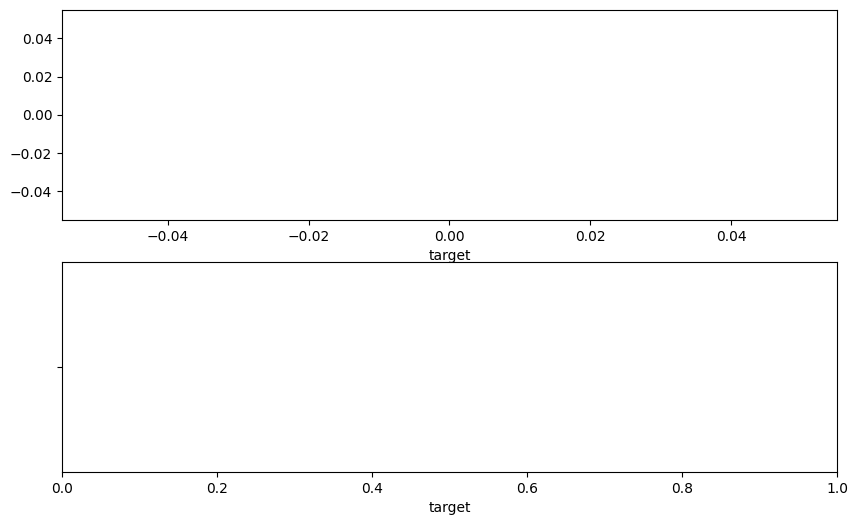

In [347]:
#I will do the same for the target so the assumtions for regression-models is fulfilles
prediktiv.target = np.log(prediktiv.target)
fig, axes = plt.subplots(2, figsize =(10, 6))
sns.distplot(ax = axes[0], a =prediktiv.target);
sns.boxplot(ax = axes[1], x = prediktiv.target);


In [346]:
#There is some outliers in target as well, I will get rid of that in the same way as for the other features
prediktiv = prediktiv[(np.abs(stats.zscore(prediktiv.target)) < 3)]

In [343]:
prediktiv.head()

,target,feature03,feature04,feature05,feature06,feature07,feature09,feature10.1,feature14,feature17,...,feature13_blue,feature13_green,feature13_pink,feature13_red,feature13_yellow,feature16_amazing,feature16_bad,feature16_good,feature16_horrible,feature16_okay
id,,,,,,,,,,,,,,,,,,,,,
1,2.507841,0,1080.0,1656,7,1656,5,1,2,3,...,0,0,0,1,0,0,1,0,0,0
2,2.447699,0,882.0,896,5,896,6,1,0,2,...,0,0,0,1,0,0,1,0,0,0
3,2.489500,0,1329.0,1329,6,1329,6,1,0,3,...,0,0,0,1,0,0,0,1,0,0
4,2.518093,0,2110.0,2110,8,2110,5,2,2,3,...,0,0,0,1,0,1,0,0,0,0
5,2.497679,0,928.0,928,6,1629,5,2,1,3,...,0,0,0,1,0,0,1,0,0,0


Summation  

In [330]:
#There is 26 features left and 2847 rows
#The categorical variables are dummys
#There is no NAN-values left in the dataset
#There is no multicollinarity between the features

#This fulfills the assumptions for my models:
#There has to be homoskedasticity (homogenic variance within each feature)
#There can not be any correaltion between the features (multicollinarity)
#If the features has a normal distribution one can make assupmtions about the paramters and it will be easier to work with
#The target y has to be in some way correlated with the feature x, which was displayed in the scatterplots.

#I want to use the 10 best features in my models:
top_features = prediktiv.corr().loc['target'].apply(np.abs).sort_values(ascending=False).index[1:11]
top_features = list(top_features)
top_features

['feature07',
 'feature04',
 'feature05',
 'feature23',
 'feature10.1',
 'feature16_bad',
 'feature14',
 'feature06',
 'feature16_good',
 'feature16_amazing']

Models using the ten best features

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score


Create training and test-set

In [331]:
x = prediktiv[top_features]
y = prediktiv['target']
robust_scaler = RobustScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 124)

#This is a holdout cross validation which keeps 20% of the original data as "testdata", whihc is kept to evaluate the model.
# The 80% that is not test-data is used for training the model to find the right parameter and prediction. 


In [332]:
print(x.columns)

Index(['feature07', 'feature04', 'feature05', 'feature23', 'feature10.1',
       'feature16_bad', 'feature14', 'feature06', 'feature16_good',
       'feature16_amazing'],
      dtype='object')


Preparing a new dataframe 'df' for analysis

In [333]:
df = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE'], 
                       columns = ['NULL', 'MLR', 'KNN', 'LASSO'])


#MSE is short for Mean squared Error
#This is the squared average error between each observed value and it estimated value 
#MSE is the sum of al theese errors, which means that if the MSE is low: the model is good 

#RMSE is short for Root mean squared error
#It is what it sounds like, the root of MSE.
#RMSE has the same scale as the observation since it is not squared 
#As in MSE, it is the sum of errors and therefore a low value is good


#MAE is short for Mean absolute error
#This is the average error between the observed value and estimated value
#MAE is not squared, and has the same scale as the observations 
#MAE < RMSE, since RMSE uses already squared values
#RMSE is therefore desirable when there might be big errors 

First, the NULL-modell which predicts the average of the target

In [335]:
y_pred_null_modell = y_train.mean()
df.loc['MSE', 'NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null_modell, y_train.size), y_true = y_train)
df.loc['MSE', 'NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null_modell, y_test.size), y_true = y_test)

df.loc['RMSE','NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null_modell, y_train.size), y_true=y_train, squared=False)
df.loc['RMSE','NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null_modell, y_test.size), y_true=y_test, squared=False)

df.loc['MAE','NULL'] = mean_absolute_error(y_pred=np.repeat(y_pred_null_modell, y_train.size), y_true=y_train)
df.loc['MAE','NULL'] = mean_absolute_error(y_pred=np.repeat(y_pred_null_modell, y_test.size), y_true=y_test)
print(y_pred_null_modell)


2.485584060818807


Then, a multiple linear regression

In [336]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

df.loc['MSE', 'MLR'] = mean_squared_error(y_pred=lin_reg.predict(x_train), y_true=y_train)
df.loc['MSE', 'MLR'] = mean_squared_error(y_pred=lin_reg.predict(x_test), y_true = y_test)

df.loc['RMSE','MLR'] = mean_squared_error(y_pred=lin_reg.predict(x_train), y_true=y_train, squared = False)
df.loc['RMSE','MLR'] = mean_squared_error(y_pred=lin_reg.predict(x_test), y_true=y_test, squared = False)

df.loc['MAE','MLR'] = mean_absolute_error(y_pred=lin_reg.predict(x_train), y_true=y_train)
df.loc['MAE','MLR'] = mean_absolute_error(y_pred=lin_reg.predict(x_test), y_true=y_test)


#MLR are used to describe the relationships between features, dependent and independent
#The MLR are used to predict the target-value for certain independent variables

#https://www.scribbr.com/statistics/multiple-linear-regression/

Then, the KNN (K-nearest neighbor)-model

In [337]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors = 10, weights = 'distance', metric = 'euclidean')
knn_model.fit(x_train, y_train)

df.loc['MSE','KNN'] = mean_squared_error(y_pred=knn_model.predict(x_train), y_true=y_train)
df.loc['MSE','KNN'] = mean_squared_error(y_pred=knn_model.predict(x_test), y_true=y_test)

df.loc['RMSE','KNN'] = mean_squared_error(y_pred=knn_model.predict(x_train), y_true=y_train, squared = False)
df.loc['RMSE','KNN'] = mean_squared_error(y_pred=knn_model.predict(x_test), y_true=y_test, squared = False)

df.loc['MAE','KNN'] = mean_absolute_error(y_pred=knn_model.predict(x_train), y_true=y_train)
df.loc['MAE','KNN'] = mean_absolute_error(y_pred=knn_model.predict(x_test), y_true=y_test)

#Knn is a cluster-method which uses the k nearest value 
#In a regression the model predicts the best output value from the nearest values in point
#In this way one can make predictions from choosed distance, in this case the euclidean.
#Connection the predictions creates a regression and the MSE etc. 
#A high k-value avoids overfitting but it can also lose some predictive power on the margins 

#https://towardsdatascience.com/the-basics-knn-for-classification-and-regression-c1e8a6c955

And last, the Lasso-model

In [338]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.05)
lasso_model.fit(x_train, y_train)

df.loc['MSE','LASSO'] = mean_squared_error(y_pred=lasso_model.predict(x_train), y_true=y_train)
df.loc['MSE','LASSO'] = mean_squared_error(y_pred=lasso_model.predict(x_test), y_true=y_test)

df.loc['RMSE','LASSO'] = mean_squared_error(y_pred=lasso_model.predict(x_train), y_true=y_train, squared= False)
df.loc['RMSE','LASSO'] = mean_squared_error(y_pred=lasso_model.predict(x_test), y_true=y_test, squared = False)

df.loc['MAE','LASSO'] = mean_absolute_error(y_pred=lasso_model.predict(x_train), y_true=y_train)
df.loc['MAE','LASSO'] = mean_absolute_error(y_pred=lasso_model.predict(x_test), y_true=y_test)


#Lasso-model are shrinking the values towards a central point.
#The regression 'punishes' features with high correaltion and sets them to 0
#Large error means that the model might eliminate some coefficients
#Since the ten best features has been choosen for the model, lasso might not be needed

# https://www.statisticshowto.com/lasso-regression/

In [339]:
print('Features choosen by Lasso:\n')
for i, var in enumerate(x.columns[lasso_model.coef_>0]):
    print("{}.{}".format(i+1, var))

Features choosen by Lasso:

1.feature07
2.feature04
3.feature05
4.feature23


In [340]:
df

,NULL,MLR,KNN,LASSO
MSE,0.000971,0.000184,0.000262,0.000252
RMSE,0.031158,0.013555,0.0162,0.015876
MAE,0.025029,0.01037,0.011386,0.011932


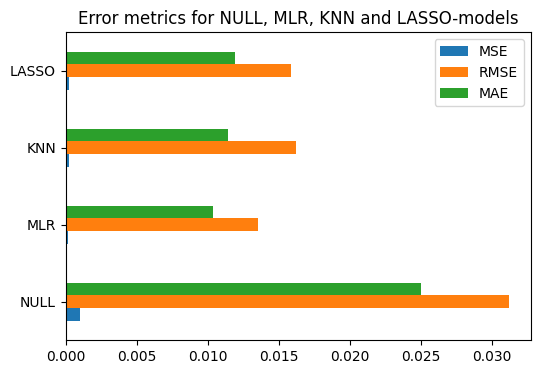

In [341]:
fig, ax = plt.subplots(figsize=(6,4))
df.T.plot(kind='barh', ax=ax)
ax.set_title('Error metrics for NULL, MLR, KNN and LASSO-models');

RESULT

In [283]:
#In each of theese models the outcome is based on finding the ordinary least squares.
#This means finding the value between the observed and estimated value
#This value is an error, as explained before, and in any model this error must be minimized


#For this data the lowest value was predicted in the multiple regression model, which tells us that this model has the best prediction for our target Y ('target'), based on selected features.
#The LASSO- and KNN-model did also predict small value for MSE but failed at RMSE and MAE, which has significantly higher values
#Lasso only choosed to keep 4 of the features, which also must be included in the analysis. 


